In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
import DataLoader

In [13]:
x_train,x_test,y_train,y_test = DataLoader.get_data(display_details=False)

In [14]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

x_train_scaled = standard_scaler.fit_transform(x_train)
x_train_min_max = min_max_scaler.fit_transform(x_train)

x_test_scaled = standard_scaler.fit_transform(x_test)
x_test_min_max = min_max_scaler.fit_transform(x_test)

In [ ]:
# For Standard Scaled 
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    print('Classification report for number of k (test_data): ',i)
    print(classification_report(y_test,y_pred))

Classification report for number of k (test_data):  1
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1381
           1       0.97      0.99      0.98      1575
           2       0.96      0.94      0.95      1398
           3       0.94      0.95      0.94      1428
           4       0.95      0.93      0.94      1365
           5       0.94      0.93      0.93      1263
           6       0.97      0.97      0.97      1375
           7       0.94      0.95      0.95      1459
           8       0.96      0.92      0.94      1365
           9       0.90      0.92      0.91      1391

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Classification report for number of k (test_data):  2
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1381
           1       0.95 

In [ ]:
# Comparing Min-Max with Standart Scaler Test set
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(x_train_min_max,y_train)
y_pred = knn.predict(x_test_min_max)
print('Classification report for number of k (test_data): ',3)
print(classification_report(y_test,y_pred))

Classification report for number of k (test_data):  3
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.97      0.99      0.98      1575
           2       0.98      0.97      0.98      1398
           3       0.97      0.97      0.97      1428
           4       0.98      0.96      0.97      1365
           5       0.97      0.96      0.97      1263
           6       0.98      0.99      0.99      1375
           7       0.97      0.97      0.97      1459
           8       0.99      0.95      0.97      1365
           9       0.95      0.96      0.95      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



Selected n_neighbors = 3 with Min Max scaler for best results

---



In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

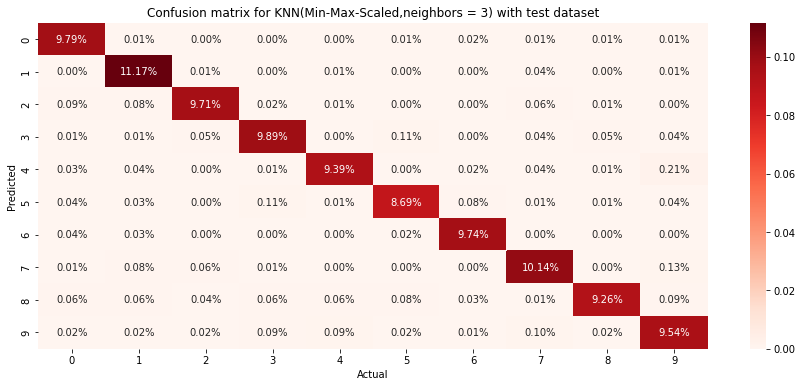

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for KNN(Min-Max-Scaled,neighbors = 3) with test dataset')
cf

In [ ]:
# Standard Scaled
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_train_scaled)
    print('Classification report for number of k (train_data): ',i)
    print(classification_report(y_train,y_pred))

Classification report for number of k (train_data):  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5522
           1       1.00      1.00      1.00      6302
           2       1.00      1.00      1.00      5592
           3       1.00      1.00      1.00      5713
           4       1.00      1.00      1.00      5459
           5       1.00      1.00      1.00      5050
           6       1.00      1.00      1.00      5501
           7       1.00      1.00      1.00      5834
           8       1.00      1.00      1.00      5460
           9       1.00      1.00      1.00      5567

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000

Classification report for number of k (train_data):  2
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5522
           1       0.9

In [ ]:
# Comparing Min-Max with Standart Scaler Train set
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(x_train_min_max,y_train)
y_pred = knn.predict(x_train_min_max)
print('Classification report for number of k (train_data): ',3)
print(classification_report(y_train,y_pred))

Classification report for number of k (train_data):  3
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5522
           1       0.98      1.00      0.99      6302
           2       0.99      0.98      0.99      5592
           3       0.98      0.99      0.98      5713
           4       0.99      0.98      0.99      5459
           5       0.99      0.98      0.98      5050
           6       0.99      0.99      0.99      5501
           7       0.98      0.99      0.99      5834
           8       1.00      0.96      0.98      5460
           9       0.98      0.98      0.98      5567

    accuracy                           0.99     56000
   macro avg       0.99      0.99      0.99     56000
weighted avg       0.99      0.99      0.99     56000



Selecting n_neighbors with 3 for train data and min_max scaler over standard scaler

In [ ]:
cf_matrix = confusion_matrix(y_train, y_pred)

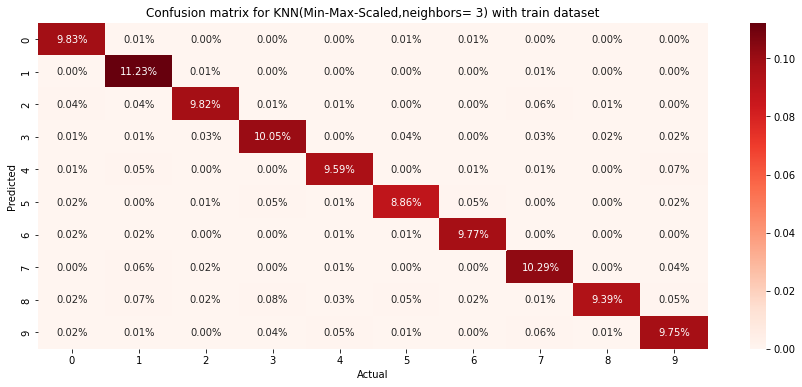

In [ ]:
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for KNN(Min-Max-Scaled,neighbors= 3) with train dataset')
cf

In [ ]:
depth = np.arange(1,10)
leaves = [1,2,4,8,16,32]
param_grid =[{'max_depth':depth,
             'min_samples_leaf':leaves}]

In [ ]:
dtree = DecisionTreeClassifier()
clf_GS = GridSearchCV(dtree,param_grid=param_grid)


In [ ]:
clf_GS.fit(x_train_min_max,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_leaf': [1, 2, 4, 8, 16, 32]}])

In [ ]:
print('Best Depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])

Best Depth: 9
Best min_samples_leaf: 4


In [ ]:
dtree = DecisionTreeClassifier(max_depth=9,min_samples_leaf=4)
dtree.fit(x_train_min_max,y_train)
y_pred = dtree.predict(x_test_min_max)
print("Decision tree classification report for test set with best params")
print(classification_report(y_test,y_pred))

Decision tree classification report for test set with best params
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1381
           1       0.88      0.94      0.91      1575
           2       0.80      0.83      0.82      1398
           3       0.83      0.77      0.80      1428
           4       0.84      0.83      0.83      1365
           5       0.79      0.77      0.78      1263
           6       0.89      0.86      0.88      1375
           7       0.89      0.86      0.87      1459
           8       0.76      0.77      0.76      1365
           9       0.80      0.83      0.81      1391

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



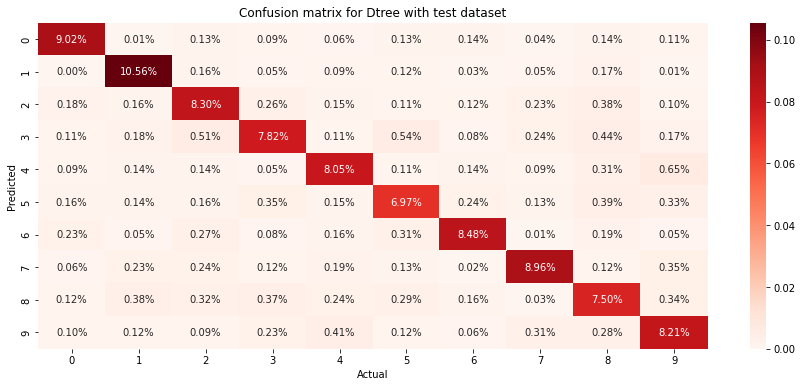

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for Dtree with test dataset')
cf

In [ ]:
dtree = DecisionTreeClassifier(max_depth=9,min_samples_leaf=4)
dtree.fit(x_train_min_max,y_train)
y_pred = dtree.predict(x_train_min_max)
print("Decision tree classification report for train set with best params")
print(classification_report(y_train,y_pred))

Decision tree classification report for train set with best params
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5522
           1       0.89      0.94      0.92      6302
           2       0.84      0.87      0.85      5592
           3       0.87      0.81      0.84      5713
           4       0.86      0.84      0.85      5459
           5       0.83      0.82      0.83      5050
           6       0.91      0.89      0.90      5501
           7       0.90      0.89      0.89      5834
           8       0.80      0.80      0.80      5460
           9       0.82      0.84      0.83      5567

    accuracy                           0.87     56000
   macro avg       0.86      0.86      0.86     56000
weighted avg       0.87      0.87      0.86     56000



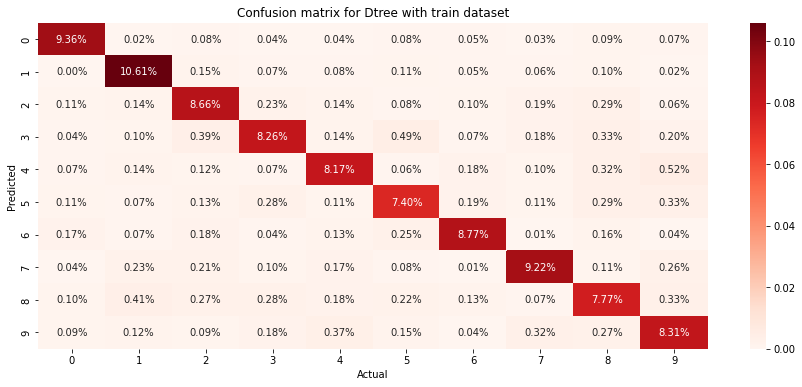

In [ ]:
cf_matrix = confusion_matrix(y_train, y_pred)
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for Dtree with train dataset')
cf

In [ ]:
C_param_range = [0.001,0.01,0.1,1]
for i in C_param_range:
  lr = LogisticRegression(C = i,max_iter=1000)
  lr.fit(x_train_min_max,y_train)
  y_pred = lr.predict(x_test_min_max)
  print('Classification report for value of C (test_data): ',i)
  print(classification_report(y_test,y_pred))

Classification report for value of C (test_data):  0.001
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1381
           1       0.90      0.97      0.93      1575
           2       0.91      0.85      0.88      1398
           3       0.88      0.87      0.87      1428
           4       0.88      0.90      0.89      1365
           5       0.86      0.83      0.85      1263
           6       0.92      0.94      0.93      1375
           7       0.91      0.91      0.91      1459
           8       0.87      0.83      0.85      1365
           9       0.86      0.86      0.86      1391

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000

Classification report for value of C (test_data):  0.01
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1381
           1       

In [ ]:
# Selecting best C value for test data
lr = LogisticRegression(C=0.1,max_iter=1000)
lr.fit(x_train_min_max,y_train)
y_pred = lr.predict(x_test_min_max)
print('Classification report for value of C (test_data): ',0.1)
print(classification_report(y_test,y_pred))

Classification report for value of C (test_data):  0.1
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1381
           1       0.96      0.98      0.97      1575
           2       0.93      0.90      0.91      1398
           3       0.89      0.90      0.90      1428
           4       0.92      0.93      0.92      1365
           5       0.88      0.87      0.88      1263
           6       0.95      0.96      0.95      1375
           7       0.93      0.93      0.93      1459
           8       0.90      0.87      0.88      1365
           9       0.90      0.91      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



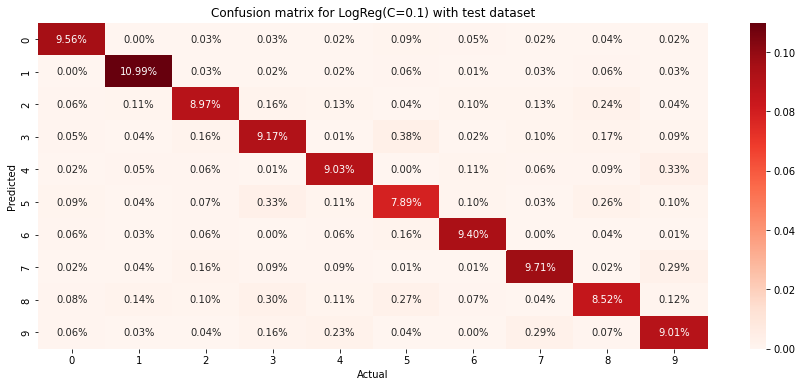

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for LogReg(C=0.1) with test dataset')
cf

In [ ]:
C_param_range = [0.001,0.01,0.1,1]
for i in C_param_range:
  lr = LogisticRegression(C = i,max_iter=1000)
  lr.fit(x_train_min_max,y_train)
  y_pred = lr.predict(x_train_min_max)
  print('Classification report for value of C (train_data): ',i)
  print(classification_report(y_train,y_pred))

Classification report for value of C (train_data):  0.001
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5522
           1       0.89      0.97      0.93      6302
           2       0.90      0.85      0.88      5592
           3       0.89      0.86      0.87      5713
           4       0.89      0.91      0.90      5459
           5       0.87      0.83      0.85      5050
           6       0.92      0.94      0.93      5501
           7       0.91      0.91      0.91      5834
           8       0.87      0.84      0.85      5460
           9       0.86      0.86      0.86      5567

    accuracy                           0.89     56000
   macro avg       0.89      0.89      0.89     56000
weighted avg       0.89      0.89      0.89     56000

Classification report for value of C (train_data):  0.01
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5522
           1     

In [15]:
# Selecting best C value for train data
lr = LogisticRegression(C=1,max_iter=1000)
lr.fit(x_train_min_max,y_train)
y_pred = lr.predict(x_train_min_max)
print('Classification report for value of C (train_data): ',1)
print(classification_report(y_train,y_pred))

Classification report for value of C (train_data):  1
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5522
           1       0.96      0.98      0.97      6302
           2       0.93      0.92      0.93      5592
           3       0.93      0.92      0.92      5713
           4       0.95      0.95      0.95      5459
           5       0.92      0.91      0.91      5050
           6       0.96      0.97      0.96      5501
           7       0.95      0.95      0.95      5834
           8       0.91      0.91      0.91      5460
           9       0.92      0.92      0.92      5567

    accuracy                           0.94     56000
   macro avg       0.94      0.94      0.94     56000
weighted avg       0.94      0.94      0.94     56000



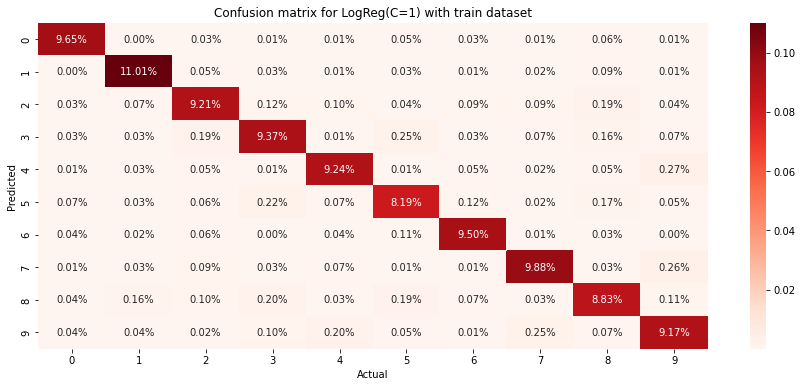

In [16]:
cf_matrix = confusion_matrix(y_train, y_pred)
fig, ax = plt.subplots(figsize=(15,6)) 
cf = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
cf.set(xlabel='Actual', ylabel='Predicted',title='Confusion matrix for LogReg(C=1) with train dataset')
cf